In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score


In [2]:
ds=pd.read_csv('IRIS.csv')
ds.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
ds.shape

(150, 5)

In [4]:
ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
ds.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
data = ds.groupby('species')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [7]:
ds['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x2717c4db950>,
 'caps': [<matplotlib.lines.Line2D at 0x2717c4c2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2717c482dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2717c4e6990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2717c4e7390>],
 'means': []}

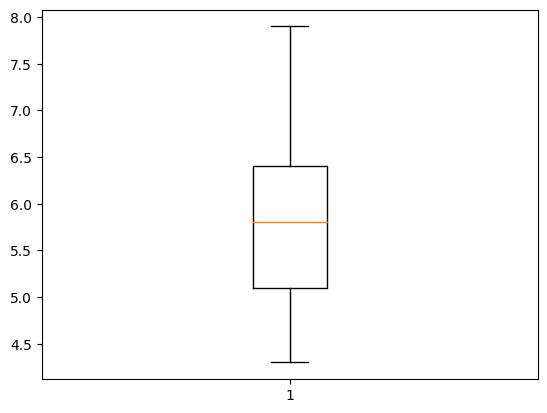

In [9]:
plt.boxplot(ds['sepal_length'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2717e7012d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2717e702b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2717e7007d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2717e703f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2717c4c3090>],
 'means': []}

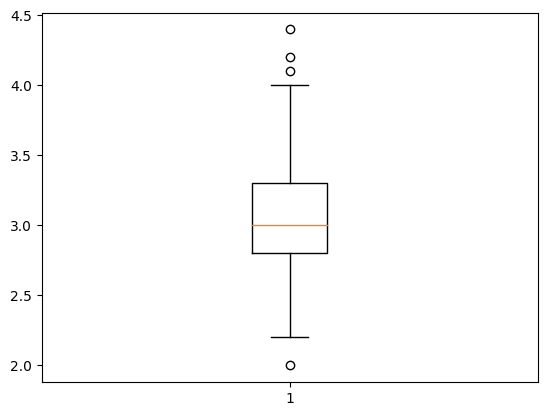

In [10]:
plt.boxplot(ds['sepal_width']) #there are some outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x2717e76e690>,
 'caps': [<matplotlib.lines.Line2D at 0x2717e76fc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2717e76da10>],
 'medians': [<matplotlib.lines.Line2D at 0x2717e77d350>],
 'fliers': [<matplotlib.lines.Line2D at 0x2717e741450>],
 'means': []}

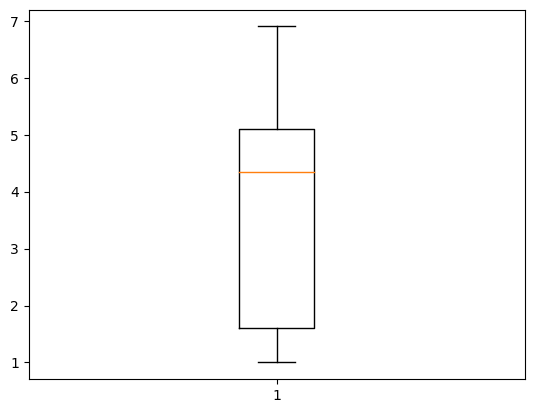

In [11]:
plt.boxplot(ds['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27158d2fb10>,
 'caps': [<matplotlib.lines.Line2D at 0x27158d39210>,
 'boxes': [<matplotlib.lines.Line2D at 0x27158d2ef50>],
 'medians': [<matplotlib.lines.Line2D at 0x27158d3a790>],
 'fliers': [<matplotlib.lines.Line2D at 0x27158d3ab50>],
 'means': []}

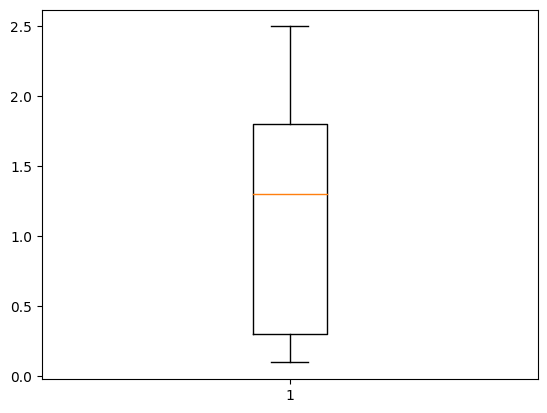

In [12]:
plt.boxplot(ds['petal_width'])

<Axes: >

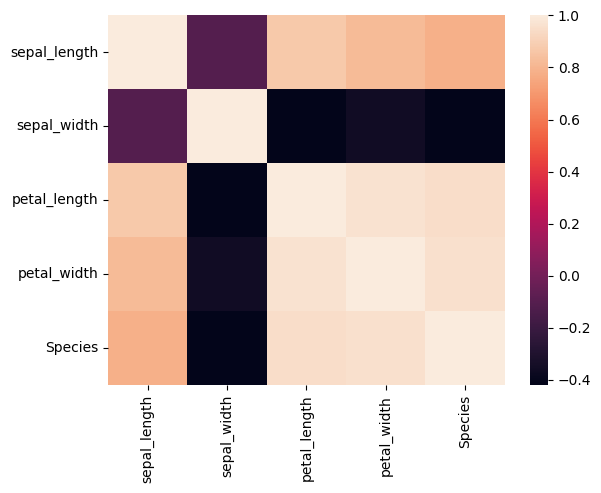

In [13]:
#checking co-linearity
from sklearn.preprocessing import LabelEncoder


# Use label encoding to convert string labels to numerical values
label_encoder = LabelEncoder()
ds['Species'] = label_encoder.fit_transform(ds['species'])

# Drop the original categorical column
ds.drop('species', axis=1, inplace=True)

# Create a heatmap of correlations
#correlation_matrix = ds.corr()
#plt.figure(figsize=(5, 3))
sb.heatmap(ds.corr())#sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('Correlation Heatmap')
#plt.show()



data preparation

In [14]:
#sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [15]:
ds


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
x=ds.iloc[:,0:4]

In [17]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y = ds.iloc[:,4]

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

training model

In [21]:
model=LinearRegression()
model.fit(x,y)
LinearRegression()

LinearRegression()

In [22]:
model.score(x,y)

0.9304223675331595

In [23]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [24]:
model.intercept_

0.19208399482813898

In [25]:
y_pred=model.predict(x_test)

In [26]:
print('mean squared error: %.2f'% np.mean((y_pred - y_test)**2))

mean squared error: 0.04
